In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
file = pd.read_csv('Amazon Sale Report.csv2.zip')
file.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [25]:
file.drop('New', axis=1, inplace=True)

In [26]:
file.drop('PendingS', axis=1, inplace=True)

In [27]:
file.drop('index', axis=1, inplace=True)

In [28]:
file.drop('currency', axis=1, inplace=True)

In [29]:
file.drop('ship-postal-code', axis=1, inplace=True)

In [30]:
file.drop('ship-country', axis=1, inplace=True)

In [31]:
file.shape

(128976, 15)

In [32]:
file.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,NaN


In [33]:
file.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
Amount                 7800
ship-city                35
ship-state               35
B2B                       0
fulfilled-by          89713
dtype: int64

In [34]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  Amount              121176 non-null  float64
 11  ship-city           128941 non-null  object 
 12  ship-state          128941 non-null  object 
 13  B2B                 128976 non-null  bool   
 14  fulfilled-by        39263 non-null   object 
dtypes: bool(1), float64(1), int64(1), 

In [35]:
file.describe()

,Qty,Amount
count,128976.000000,121176.000000
mean,0.904401,648.562176
std,0.313368,281.185041
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [36]:
# describe our data with object datatypes
file.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,ship-city,ship-state,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,128941,128941,39263
unique,120229,91,13,2,2,2,9,11,4,8948,69,1
top,403-4984515-8861958,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,BENGALURU,MAHARASHTRA,Easy Ship
freq,12,2085,77815,89713,128852,88630,50292,22373,109486,11208,22272,39263


In [37]:
# describe for specific columns
file[['Qty','Amount']].describe()

,Qty,Amount
count,128976.000000,121176.000000
mean,0.904401,648.562176
std,0.313368,281.185041
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [38]:
pd.isnull(file)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [39]:
pd.isnull(file).sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
Amount                 7800
ship-city                35
ship-state               35
B2B                       0
fulfilled-by          89713
dtype: int64

In [40]:
file.dropna(inplace=True)

In [41]:
file.shape

(37514, 15)

In [42]:
pd.isnull(file).sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
B2B                   0
fulfilled-by          0
dtype: int64

In [48]:
file.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,Easy Ship
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship
7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,399.00,HYDERABAD,TELANGANA,False,Easy Ship
12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,399.00,Amravati.,MAHARASHTRA,False,Easy Ship


In [49]:
file['Date']=pd.to_datetime(file['Date'])
file['Date'].dtype

C:\Users\geeta\AppData\Local\Temp\ipykernel_20716\1404200658.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file['Date']=pd.to_datetime(file['Date'])


dtype('<M8[ns]')

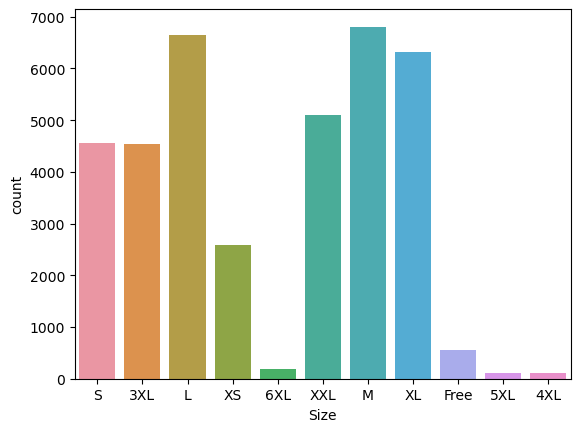

In [50]:
ax = sns.countplot(x='Size',data=file)

## Most of the people buy M size

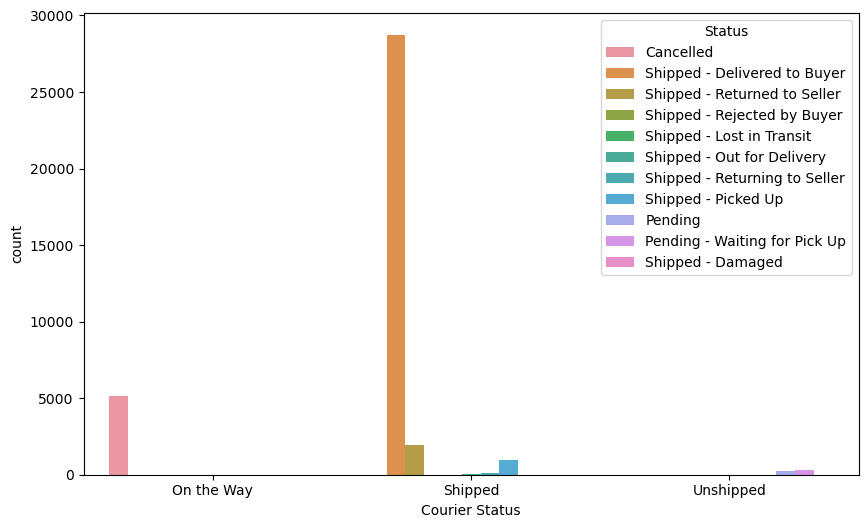

In [51]:
# courier status
plt.figure(figsize=(10,6))
sns.countplot(data=file,x = 'Courier Status',hue='Status')
plt.show()

## Majority to the orders are shipped through the courier

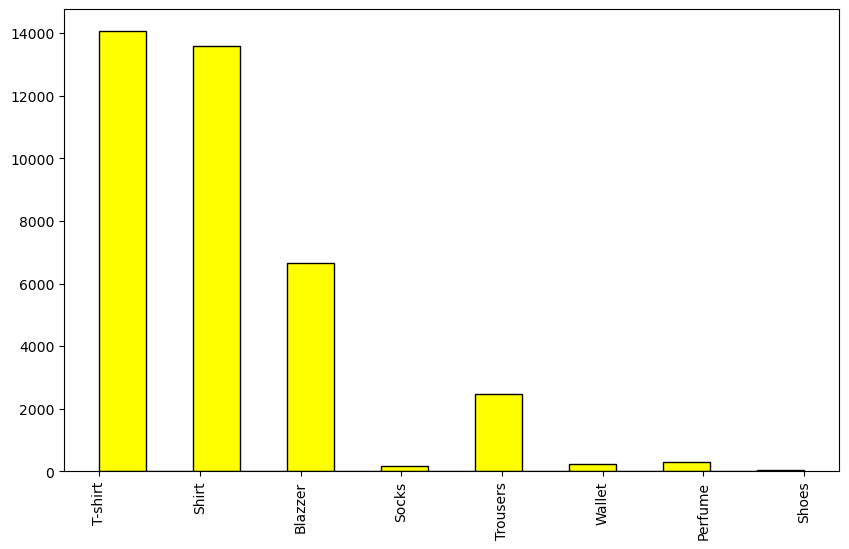

In [52]:
file['Category']= file['Category'].astype(str)
c_d = file['Category']
plt.figure(figsize=(10,6))
plt.hist(c_d,bins=15,edgecolor='black',color='yellow')
plt.xticks(rotation=90)
plt.show()

## Most of the buyers are tshirt

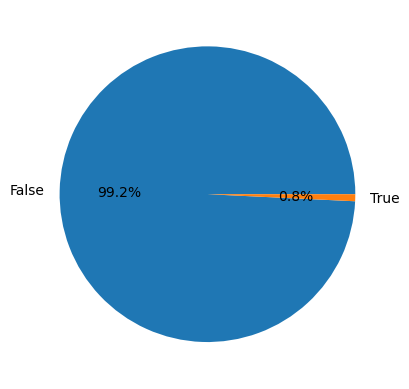

In [55]:
# check b2b data
check_b2b = file['B2B'].value_counts()

# create pie chart
plt.pie(check_b2b,labels=check_b2b.index, autopct='%1.1f%%')
plt.show()

## maximum 99.2% of buyers are retailers and 0.8% are wholesalers

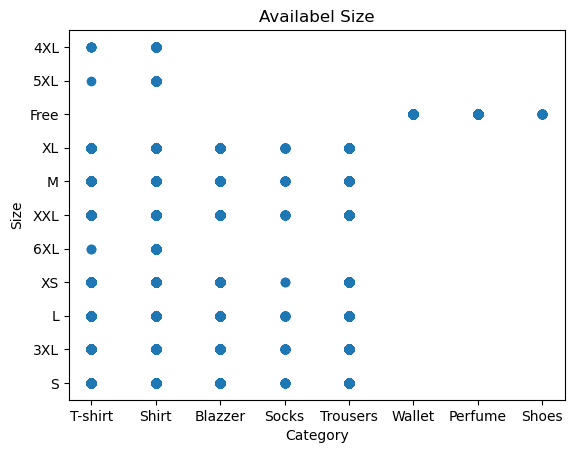

In [56]:
# scatter plot
x_data = file['Category']
y_data = file['Size']
plt.scatter(x_data,y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Availabel Size')
plt.show()

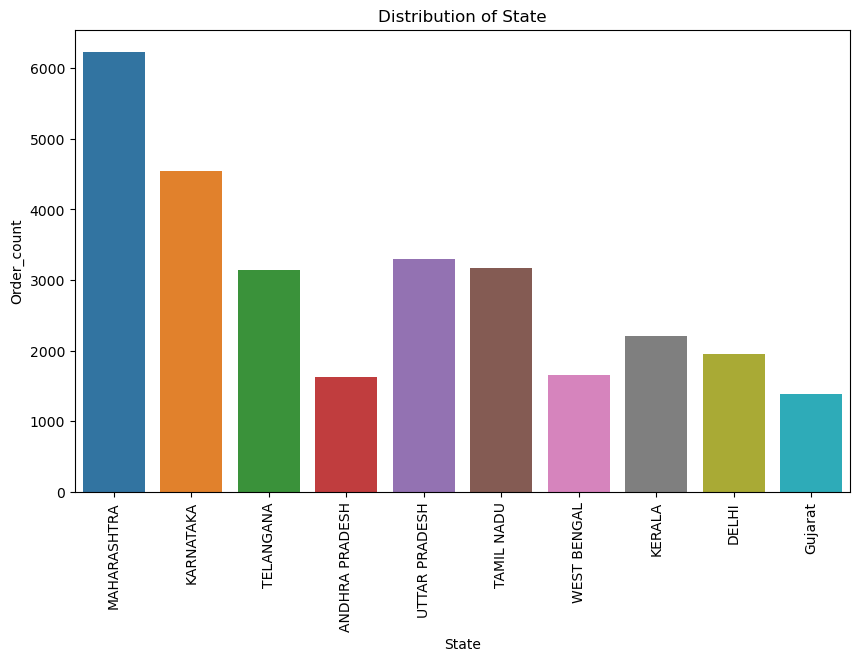

In [57]:
top10_state = file['ship-state'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.countplot(data=file[file['ship-state'].isin(top10_state.index)],x='ship-state')
plt.xlabel('State')
plt.ylabel('Order_count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

## Most of the buyers in maharashtra